# Comparativa regresiones

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

## Helper methods

In [2]:

def two_d_compare(X_test, y_test, y_pred, model_name):
    area = (12 * np.random.rand(40)) ** 2
    plt.subplots(ncols=2, figsize=(10, 4))
    plt.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred, alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()


def model_metrics(regressor, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.2f"
          % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2)
    return [mse, r2]


def two_vs_three(x_test, y_test, y_pred, z=None, isLinear=False):
    area = 60

    fig = plt.figure(figsize=(12, 6))
    fig.suptitle('2D and 3D view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(x_test, y_test, alpha=0.5, color='blue', s=area)
    ax.plot(x_test, y_pred, alpha=0.9, color='red', linewidth=2)
    ax.set_xlabel('YEAR BUILT')
    ax.set_ylabel('SELLING PRICE')

    plt.title('YEARBUILT vs SALEPRICE')

    if not isLinear:
        # Second subplot
        ax = fig.add_subplot(1, 2, 2, projection='3d')

        ax.scatter(z, x_test, y_test, color='blue', marker='o')
        ax.plot(z, x_test, y_pred, alpha=0.9, color='red', linewidth=2)
        ax.set_ylabel('YEAR BUILT')
        ax.set_zlabel('SELLING PRICE')
        ax.set_xlabel('LOT AREA')

    plt.title('LOT AREA vs YEAR BUILT vs SELLING PRICE')

    plt.show()


## Data Exploration

In [3]:
df = pd.read_csv("../data/predict_home_value.csv")
df.head()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


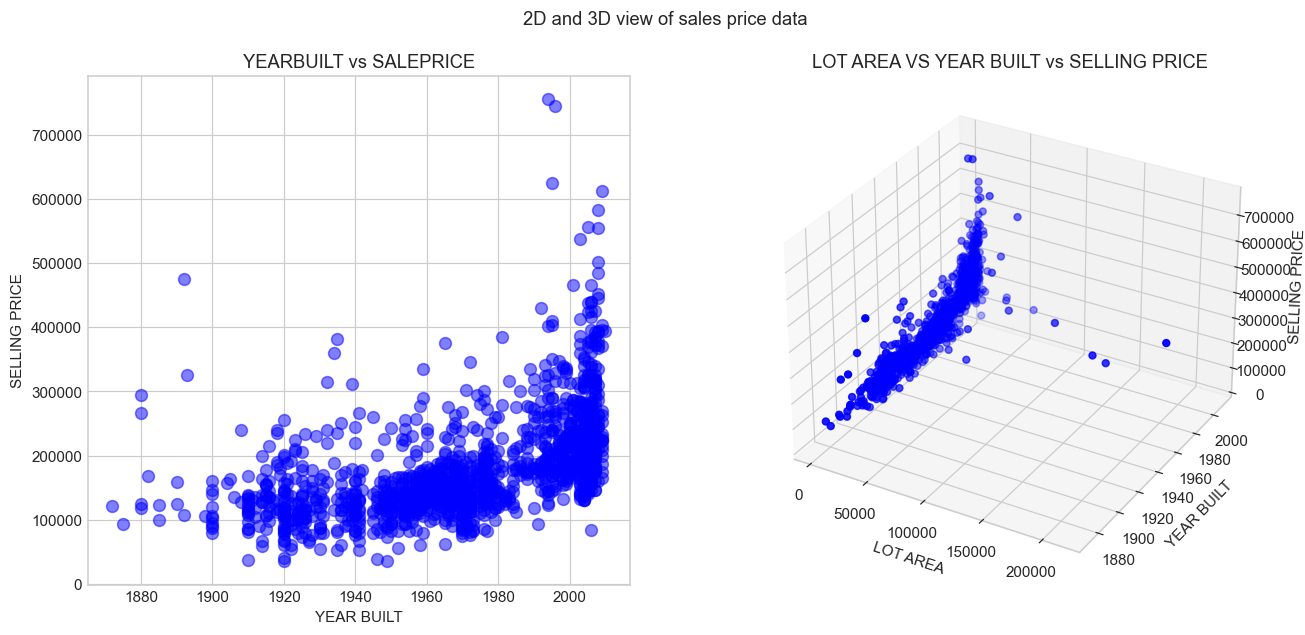

In [4]:
area = 60
x = df['YEARBUILT']
y = df['SALEPRICE']
z = df['LOTAREA']

fig = plt.figure(figsize=(14, 6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1, 2, 1)

ax.scatter(x, y, alpha=0.5, color='blue', s=area)
ax.set_xlabel('YEAR BUILT')
ax.set_ylabel('SELLING PRICE')

plt.title('YEARBUILT vs SALEPRICE')

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('YEAR BUILT')
ax.set_zlabel('SELLING PRICE')
ax.set_xlabel('LOT AREA')

plt.title('LOT AREA VS YEAR BUILT vs SELLING PRICE')

plt.show()

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'LOTAREA'}>,
        <AxesSubplot: title={'center': 'OVERALLCOND'}>,
        <AxesSubplot: title={'center': 'YEARBUILT'}>],
       [<AxesSubplot: title={'center': 'FULLBATH'}>,
        <AxesSubplot: title={'center': 'HALFBATH'}>,
        <AxesSubplot: title={'center': 'BEDROOMABVGR'}>,
        <AxesSubplot: title={'center': 'KITCHENABVGR'}>],
       [<AxesSubplot: title={'center': 'TOTRMSABVGRD'}>,
        <AxesSubplot: title={'center': 'FIREPLACES'}>,
        <AxesSubplot: title={'center': 'GARAGECARS'}>,
        <AxesSubplot: title={'center': 'POOLAREA'}>],
       [<AxesSubplot: title={'center': 'MOSOLD'}>,
        <AxesSubplot: title={'center': 'YRSOLD'}>,
        <AxesSubplot: title={'center': 'SALEPRICE'}>, <AxesSubplot: >]],
      dtype=object)

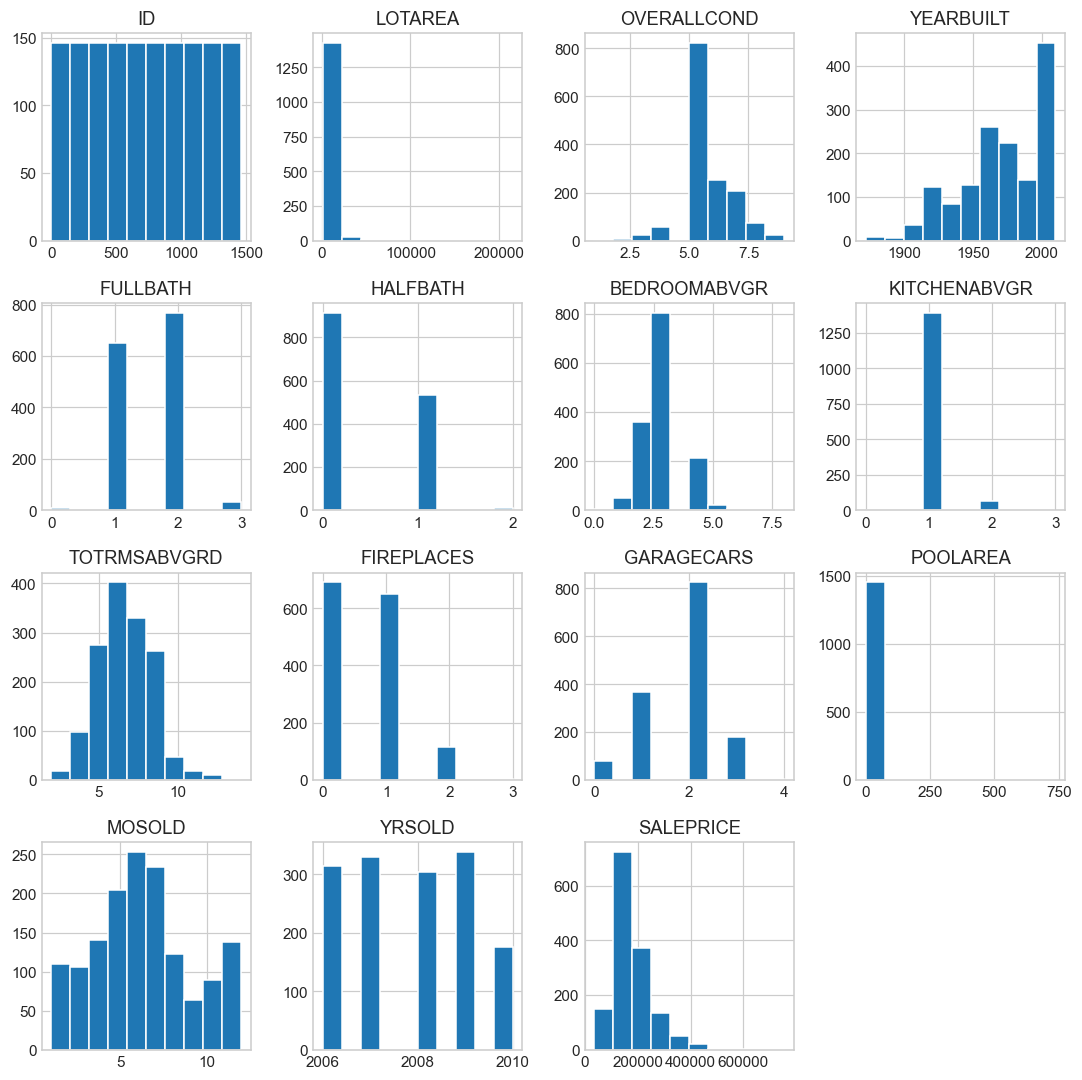

In [5]:
df.hist(figsize=(12, 12))

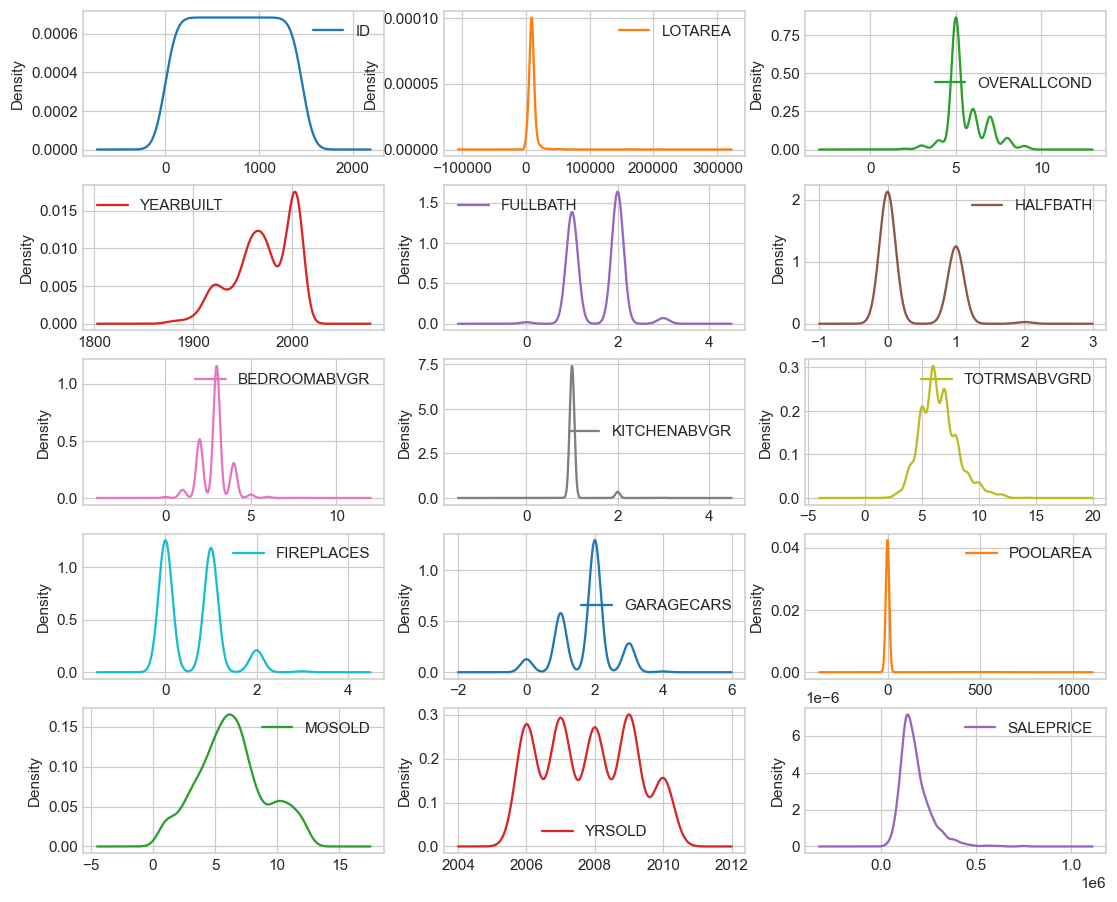

In [6]:
df.plot(kind='density', subplots=True, figsize=(12, 12), layout=(6, 3), sharex=False)
plt.show()

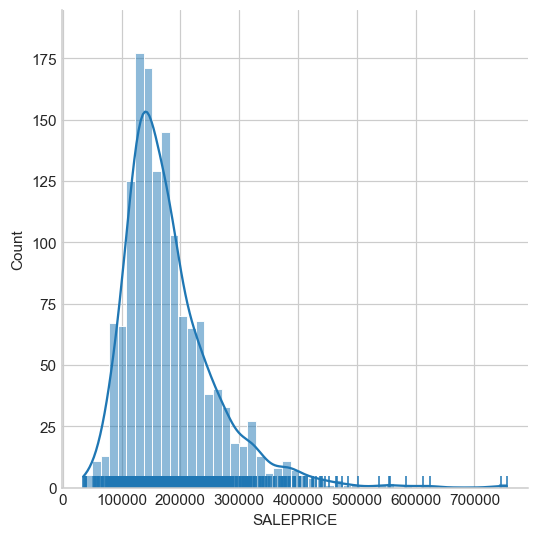

In [7]:
# sns.set(rc={'figure.figsize':(20,12)})
sns.displot(df['SALEPRICE'], kde=True, rug=True)
plt.show()

In [8]:
print("The dataset contains columns of the following data types : \n" + str(df.dtypes))

The dataset contains columns of the following data types : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


In [9]:
print("The dataset contains following number of records for each of the columns : \n" + str(df.count()))

The dataset contains following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


In [10]:
df.isnull().any()

ID              False
LOTAREA         False
BLDGTYPE        False
HOUSESTYLE      False
OVERALLCOND     False
YEARBUILT       False
ROOFSTYLE       False
EXTERCOND       False
FOUNDATION      False
BSMTCOND         True
HEATING         False
HEATINGQC       False
CENTRALAIR      False
ELECTRICAL       True
FULLBATH        False
HALFBATH        False
BEDROOMABVGR    False
KITCHENABVGR    False
KITCHENQUAL     False
TOTRMSABVGRD    False
FIREPLACES      False
FIREPLACEQU      True
GARAGETYPE       True
GARAGEFINISH     True
GARAGECARS      False
GARAGECOND       True
POOLAREA        False
POOLQC           True
FENCE            True
MOSOLD          False
YRSOLD          False
SALEPRICE       False
dtype: bool

## Data preparation

In [11]:
#remove columns that are not required
df = df.drop(['ID'], axis=1)

df.head()

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,GasA,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [12]:
df.dtypes

LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object

In [13]:
# Defining the categorical columns
cat_columns = df.select_dtypes(include=[object]).columns

print("Categorical columns : ")
print(cat_columns)

cat_simple_imputer = SimpleImputer(strategy="most_frequent")
cat_onehot_encoder = OneHotEncoder(handle_unknown='ignore')

cat_transformer = Pipeline(steps=[('impute', cat_simple_imputer), ('onehot', cat_onehot_encoder)])

Categorical columns : 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


In [14]:
# Defining the numerical columns
num_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['SALEPRICE']]
print("Numerical columns : ")
print(num_columns)

num_scaler = StandardScaler()

num_transformer = Pipeline(steps=[('scale', num_scaler)])

Numerical columns : 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


In [15]:
cat_preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns)],
                                     remainder="passthrough")
all_preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_columns),
    ('num', num_transformer, num_columns)],
    remainder="passthrough")

#. The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_temp = cat_preprocessor.fit_transform(df)
print("Data after transforming :")
print(df_temp)

df_temp2 = all_preprocessor.fit_transform(df)
print("Data after transforming :")
print(df_temp2)

Data after transforming :
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]
Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.64520971e+00  2.66500000e+05]
 [ 1.00000000e+00  0.00000000e+

In [16]:
# prepare data frame for splitting data into train and test datasets
features = []
features = df.drop(['SALEPRICE'], axis=1)

label = pd.DataFrame(df, columns=['SALEPRICE'])
#label_encoder = LabelEncoder()
label = df['SALEPRICE']

#label = label_encoder.fit_transform(label)
print(" value of label : " + str(label))


 value of label : 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SALEPRICE, Length: 1460, dtype: int64


## Regresión lineal simple

Esta es la forma más básica de regresión lineal en la que la variable que se va a predecir depende solo de otra variable. Esto se calcula usando la fórmula que generalmente se usa para calcular la pendiente de una línea.

y = w0 + w1*x1

En la ecuación anterior:

* y se refiere a la variable target
* x1 se refiere a la variable independiente
* w1 se refiere al coeficiente que expresa la relación entre y x1, también conocido como pendiente
* w0 es el coeficiente constante, también conocido como el intercept. Se refiere al desplazamiento constante que siempre tendrá y con respecto a las variables independientes.

In [17]:
X = features['YEARBUILT'].values.reshape(-1, 1)
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train_slr.shape) +
      " Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test_slr.shape) +
      " Output label" + str(y_test_slr.shape))

Dimensions of datasets that will be used for training : Input features(1095, 1) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 1) Output label(365,)


In [18]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slr_model = LinearRegression()

slr_model.fit(X_train_slr, y_train_slr)

y_pred_slr = slr_model.predict(X_test_slr)

print(slr_model)

LinearRegression()


In [19]:
print('Intercept: \n', slr_model.intercept_)
print('Coefficients: \n', slr_model.coef_)

Intercept: 
 -2517567.3215381145
Coefficients: 
 [1368.99630631]


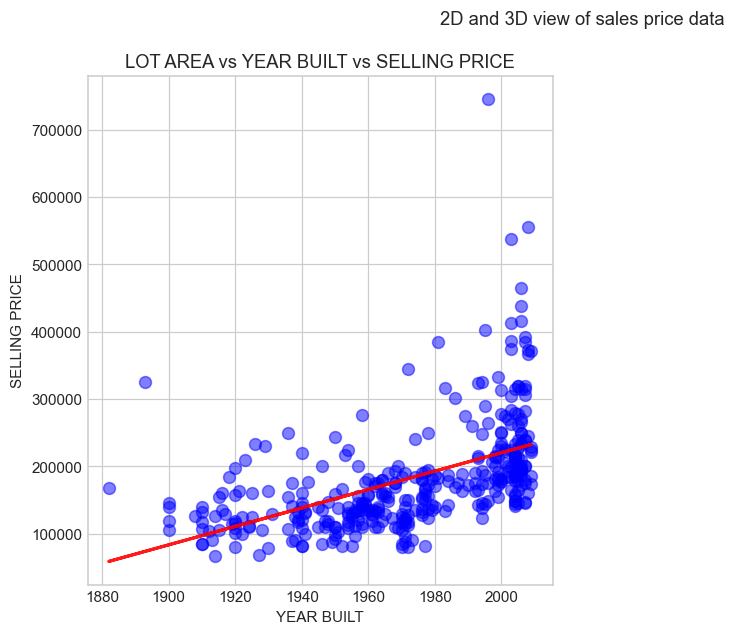

In [20]:
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)

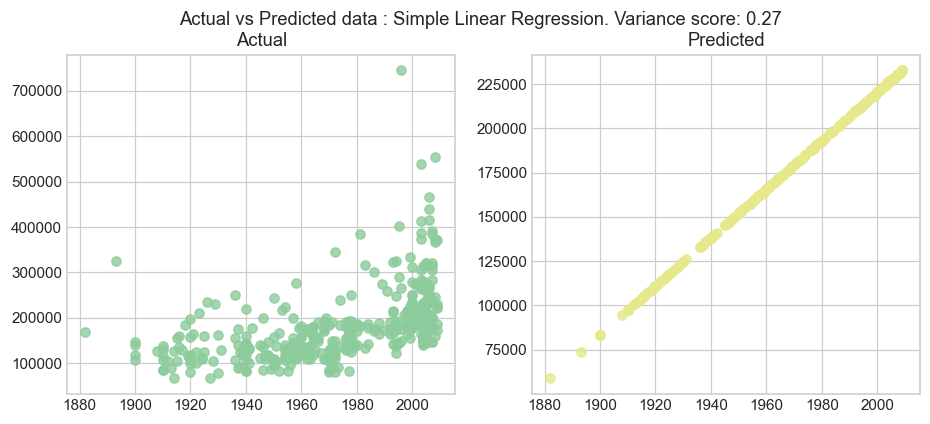

In [21]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)

In [22]:
slr_metrics = model_metrics(slr_model, y_test_slr, y_pred_slr)

Mean squared error: 4830018416.25
R2 score: 0.27


## Regresión lineal múltiple

La regresión lineal múltiple es una extensión de la regresión lineal simple. En esta configuración, el valor objetivo depende de más de una variable. El número de variables depende del caso de uso en cuestión.

Por lo general, un experto en la materia está involucrado en la identificación de los campos que contribuirán a una mejor predicción de la característica de salida.

y = w0 + w1*x1 + w2*x2 + .... + wn*xn

Dado que la regresión lineal múltiple supone que la salida depende de más de una variable, suponemos que depende de las 30 características. Los datos se dividen en conjuntos de entrenamiento y prueba. Como experimento, puede intentar eliminar algunas variables y verificar si el modelo funciona mejor.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30) Output label(365,)


In [24]:
model_name = 'Multiple Linear Regression'

mlr_model = LinearRegression()

mlr_pipeline = Pipeline(steps=[('all_preprocessor', all_preprocessor), ('regressor', mlr_model)])

mlr_pipeline.fit(X_train, y_train)

y_pred_mlr = mlr_pipeline.predict(X_test)

print(mlr_model)

LinearRegression()


In [25]:
print('Intercept: \n', mlr_model.intercept_)
print('Coefficients: \n', mlr_model.coef_)

Intercept: 
 3.9467773187030344e+18
Coefficients: 
 [-1.03964378e+13 -1.03964378e+13 -1.03964378e+13 -1.03964379e+13
 -1.03964378e+13 -8.43110907e+17 -8.43110907e+17 -8.43110907e+17
 -8.43110907e+17 -8.43110907e+17 -8.43110907e+17 -8.43110907e+17
 -8.43110907e+17  2.25611619e+17  2.25611619e+17  2.25611619e+17
  2.25611619e+17  2.25611619e+17  2.25611619e+17 -7.28779906e+17
 -7.28779906e+17 -7.28779906e+17 -7.28779906e+17 -7.28779906e+17
 -9.16662894e+17 -9.16662894e+17 -9.16662894e+17 -9.16662894e+17
 -9.16662894e+17 -9.16662894e+17 -1.51497071e+18 -1.51497071e+18
 -1.51497071e+18 -1.51497071e+18 -9.65031372e+16 -9.65031372e+16
 -9.65031372e+16 -9.65031372e+16 -9.65031372e+16 -9.65031372e+16
  3.35901316e+16  3.35901316e+16  3.35901316e+16  3.35901316e+16
  3.35901316e+16  3.19083984e+15  3.19083984e+15  8.07996350e+17
  8.07996350e+17  8.07996350e+17  8.07996350e+17  8.07996350e+17
 -1.65925563e+18 -1.65925563e+18 -1.65925563e+18 -1.65925563e+18
 -5.35762297e+17 -5.35762297e+17 -5.35

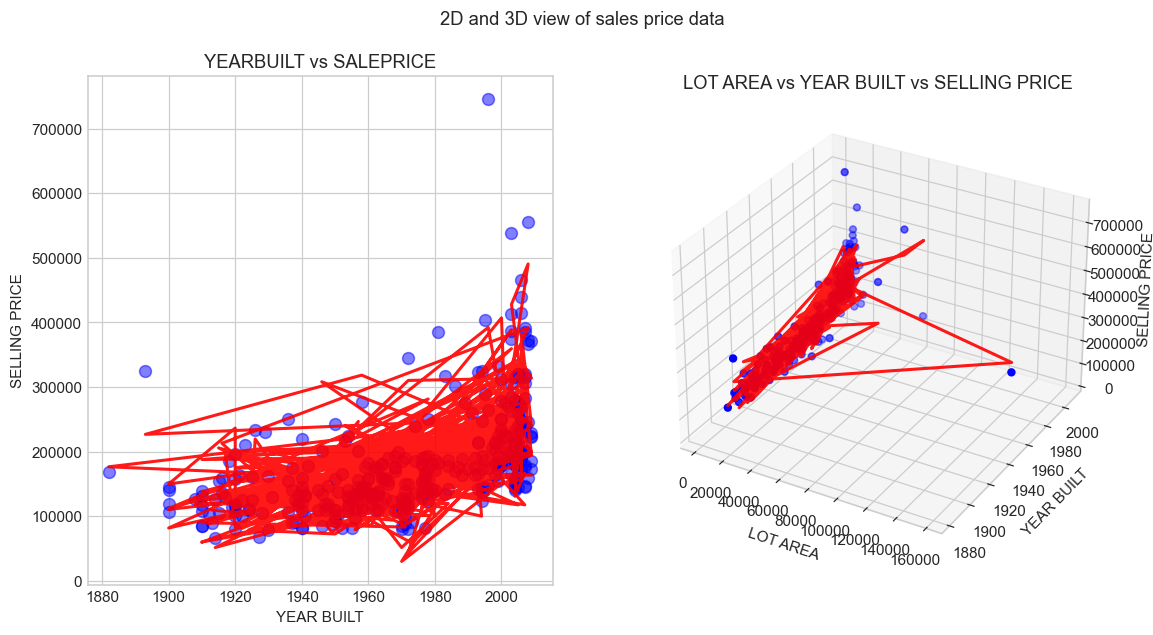

In [26]:
two_vs_three(X_test['YEARBUILT'], y_test, y_pred_mlr, X_test['LOTAREA'], False)

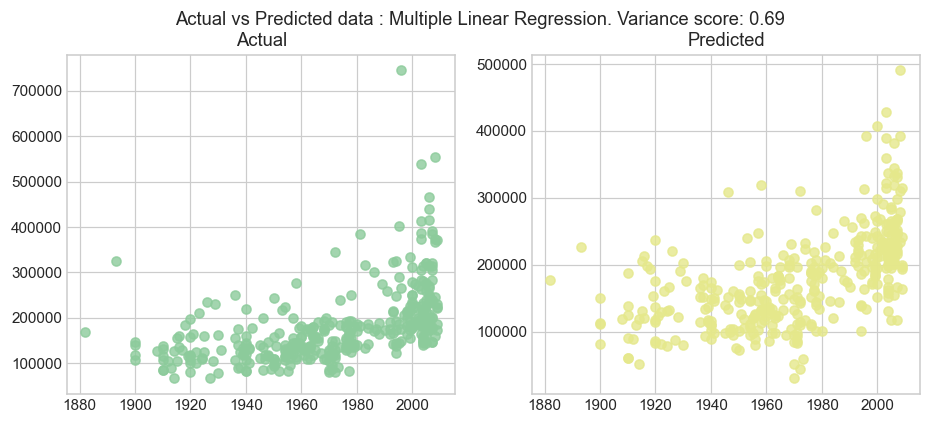

In [27]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_mlr, model_name)

In [28]:
mlr_metrics = model_metrics(mlr_model, y_test, y_pred_mlr)

Mean squared error: 2072124327.65
R2 score: 0.69


## Regresión lineal polinomial

La línea de predicción generada por la regresión simple/lineal suele ser una línea recta. En los casos en que una regresión lineal simple o múltiple no se ajusta con precisión al punto de datos, usamos la regresión lineal polinomial. La siguiente fórmula se usa en el back-end para generar una regresión lineal polinomial.

y = w0 + w1*x1 + w2*x21 + .... + wn*xnn

Suponemos que la producción depende de YEARBUILT y LOTATREA. Los datos se dividen en conjuntos de entrenamiento y prueba.

In [29]:
X = features.iloc[:, [0,4]].values
X_train, X_test, y_train, y_test = train_test_split(X,label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 2) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 2) Output label(365,)


In [30]:
from sklearn.preprocessing import PolynomialFeatures

model_name = 'Polynomial Linear Regression'

polynomial_features= PolynomialFeatures(degree=3)
plRegressor = LinearRegression()

plr_model = Pipeline(steps=[('polyFeature',polynomial_features ),('regressor', plRegressor)])

plr_model.fit(X_train,y_train)

y_pred_plr= plr_model.predict(X_test)

print(plRegressor)

LinearRegression()


In [31]:
print('Intercept: \n',plRegressor.intercept_)
print('Coefficients: \n', plRegressor.coef_)

Intercept: 
 7962555.37411169
Coefficients: 
 [ 0.00000000e+00  5.86668757e+03 -2.85704453e-01  1.21978171e-03
 -6.03747945e+00 -6.54575629e+00  2.54449113e-10 -6.61233708e-07
  1.55487325e-03  2.29385651e-03]


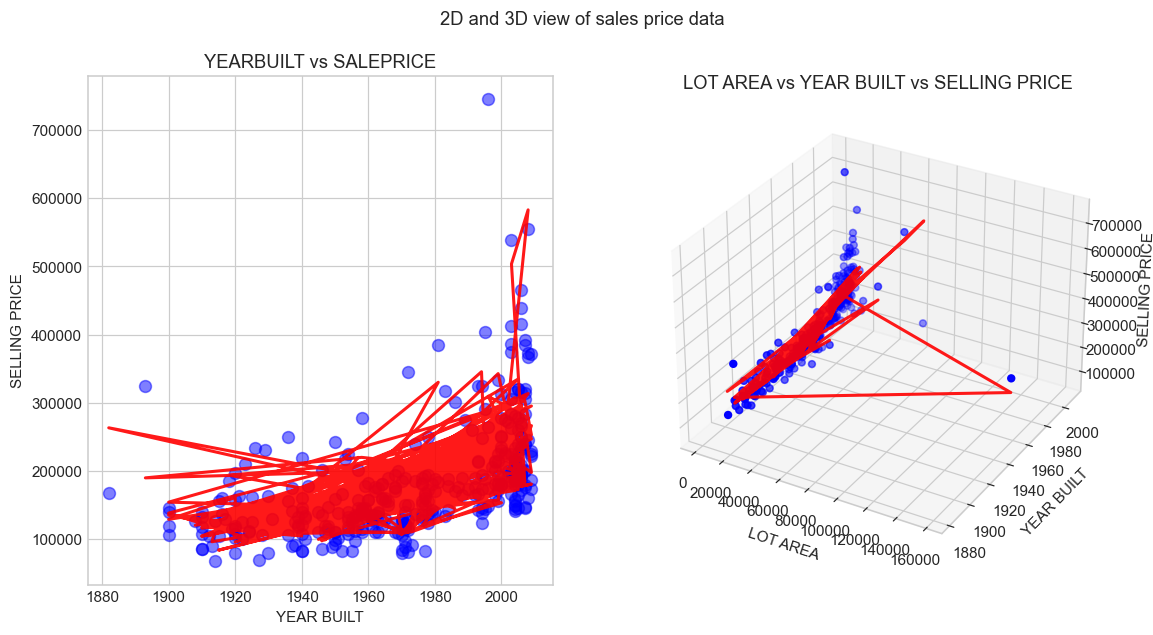

In [32]:
two_vs_three(X_test[:,1],y_test,y_pred_plr,X_test[:,0], False)

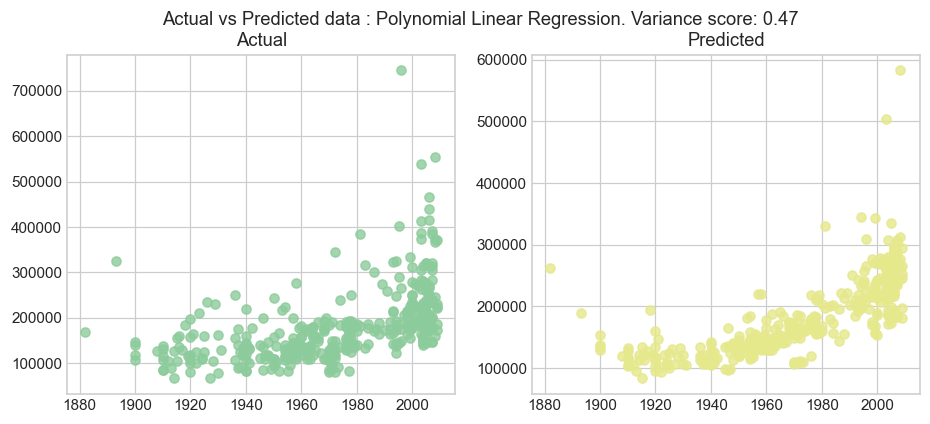

In [33]:
two_d_compare(X_test[:,1],y_test,y_pred_plr,model_name)

In [34]:
plrMetrics = model_metrics(plRegressor,y_test,y_pred_plr)

Mean squared error: 3516280615.27
R2 score: 0.47


## Resultados

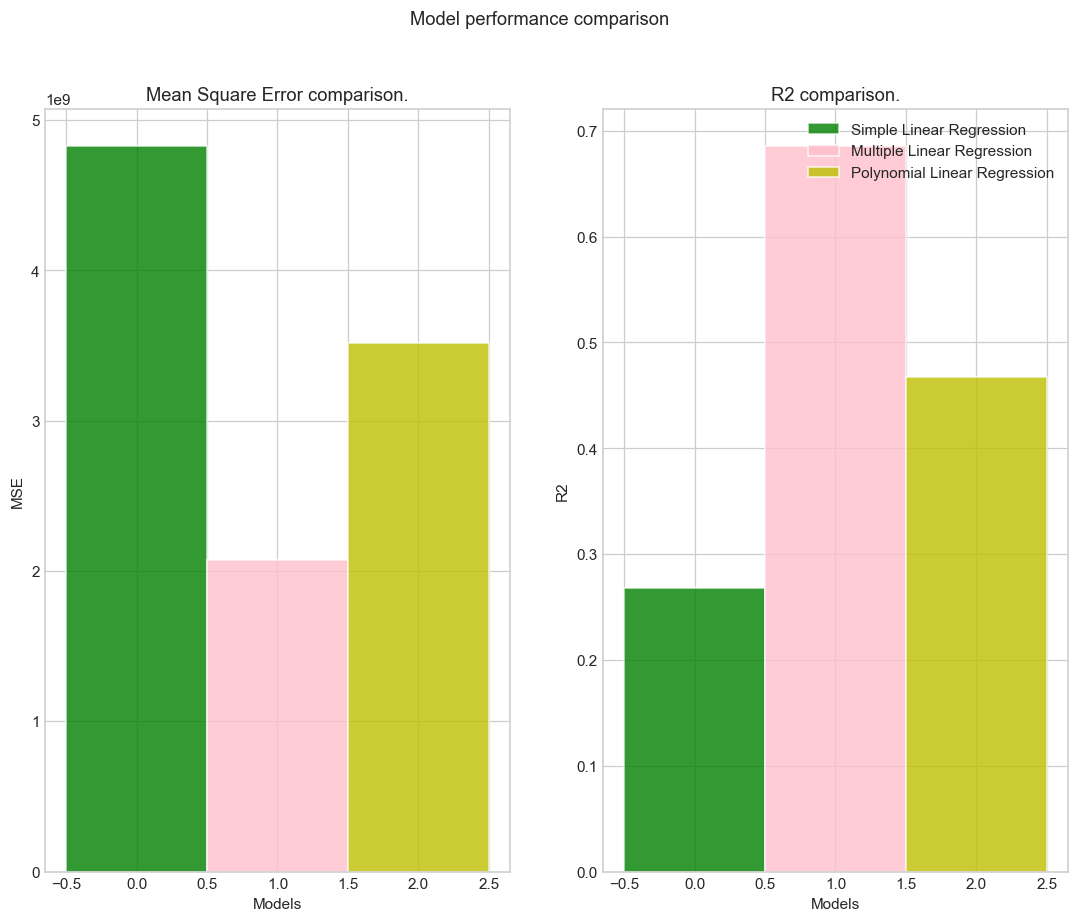

In [35]:

n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
plt.subplots(ncols=2, figsize=(12,9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, slr_metrics[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlr_metrics[0], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects3 = plt.bar(index + bar_width*2, plrMetrics[0], bar_width,
                 alpha=opacity,
                 color='y',
                 label='Polynomial Linear Regression')

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error comparison.')
#ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Polynomial Lin', 'Decision Tree','Random Forest'))

plt.subplot(122)

rects1 = plt.bar(index, slr_metrics[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlr_metrics[1], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects3 = plt.bar(index + bar_width*2, plrMetrics[1], bar_width,
                 alpha=opacity,
                 color='y',
                 label='Polynomial Linear Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')
# ax.set_xticklabels(('Simple Lin', 'Multiple Lin', 'Polynomial Lin'))



plt.legend()
plt.show()

MSE cuanto más bajo mejor.

R2 cuanto más alto mejor.

Por tanto el modelo de regresión lineal múltiple tiene mejores resultados.
